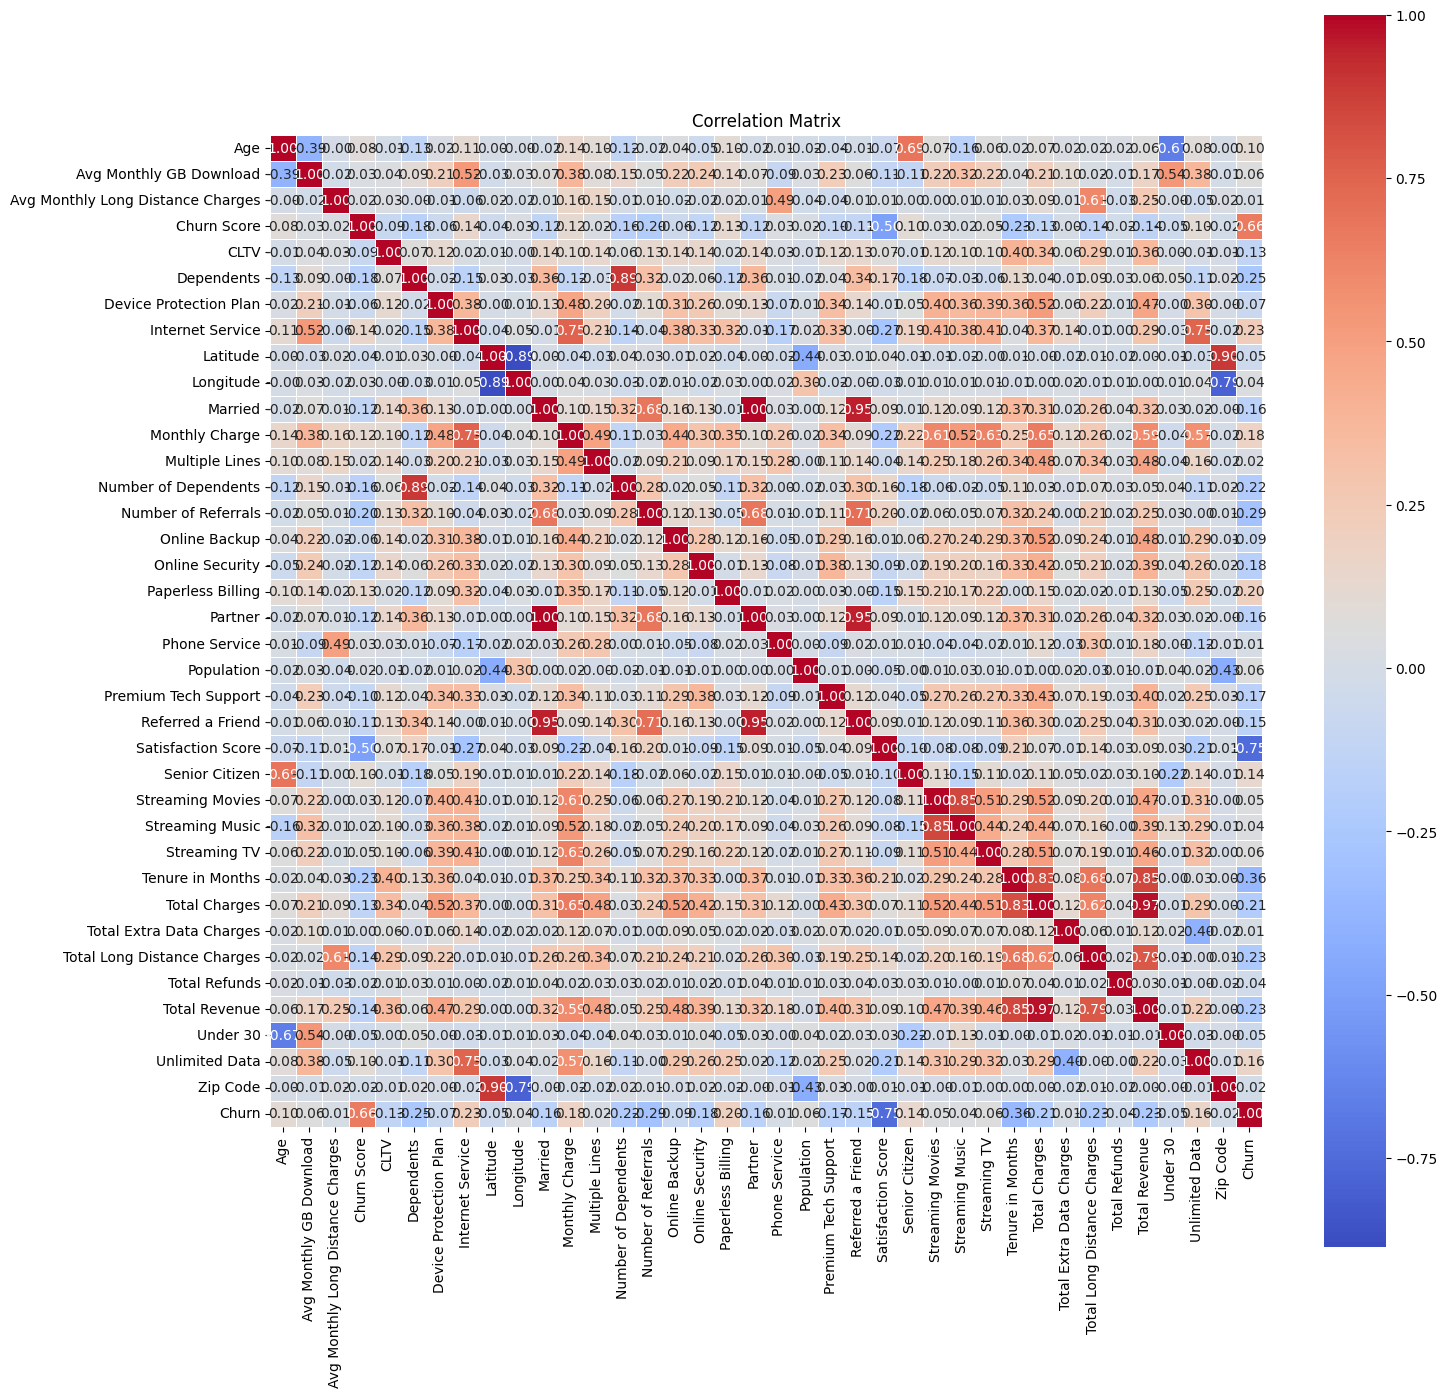

In [ ]:
#top highest corelation features with target variable 'Churn'
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('train.csv')
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',square=True,linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# identifying top features correlated with 'Churn'
corr_target = corr_matrix['Churn'].abs()
top_features = corr_target[corr_target >= 0.30].index.tolist()
print("Top features correlated with 'Churn':", top_features)

# selecting only the top features from the original dataframe
df_selected = df[top_features]
print(df_selected.head())


Top features correlated with 'Churn': ['Churn Score', 'Satisfaction Score', 'Tenure in Months', 'Churn']
   Churn Score  Satisfaction Score  Tenure in Months  Churn
0           51                   3                25      0
1           27                   3                35      0
2           59                   5                46      0
3           49                   4                27      0
4           88                   2                58      1
   Churn Score  Satisfaction Score  Tenure in Months  Churn
0           54                   3                 7      0
1           54                   5                30      0
2           26                   3                71      0
3           29                   3                 9      0
4           23                   3                25      0


In [ ]:
# check data imblance in target variable
churn_counts = df['Churn'].value_counts()
print(churn_counts)

Churn
0    3104
1    1121
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
x = df_selected.drop('Churn', axis=1)
y = df_selected['Churn']

train = df_selected.copy()

df_test = pd.read_csv('test.csv')
df_selected_test = df_test[top_features]

x_train = train.drop('Churn', axis=1)
y_train = train['Churn']

x_test = df_selected_test.drop('Churn', axis=1)
y_test = df_selected_test['Churn']

x_train_scaled = scaler.fit_transform(x_train)
X_test_scaled  = scaler.transform(x_test)

sm = SMOTE(random_state=42)

X_train_res, y_train_res = sm.fit_resample(x_train_scaled, y_train)
print("After SMOTE, counts of label '1': {}".format(sum(y_train_res==1)))
print("After SMOTE, counts of label '0': {} \n".format(sum(y_train_res==0)))

After SMOTE, counts of label '1': 3104
After SMOTE, counts of label '0': 3104 

